# Business Background

Unilever Indonesia is a Fast Moving Consumer Goods (FMCG) Company that founded in Indonesia since 1933. Since then, UNVR has taken over 60% of market share in Indonesia.
Its stock was recorded as UNVR on Indonesia Stock Exchange in 1981. For years, UNVR has been labeled as one of the most expensive on IDX list. Then, at 2020-01-02, UNVR splitted its stock price to 1:5 Therefore, UNVR price became Rp2 per share (from Rp10 per share).


#EDA

##Data

In [333]:
#mounting data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [334]:
#import lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
df = pd.read_csv('/content/drive/MyDrive/Project Github/Portofolio/UNVR.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-30,9440.0,9490.0,9200.0,9200.0,8129.802734,10209000
1,2017-05-31,9280.0,9405.0,9215.0,9235.0,8160.732422,24250000
2,2017-06-01,9235.0,9235.0,9235.0,9235.0,8160.732422,0
3,2017-06-02,9250.0,9405.0,9250.0,9380.0,8288.865234,6941000
4,2017-06-05,9350.0,9440.0,9315.0,9435.0,8337.468750,3277000


In [336]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1255 non-null   object 
 1   Open       1255 non-null   float64
 2   High       1255 non-null   float64
 3   Low        1255 non-null   float64
 4   Close      1255 non-null   float64
 5   Adj Close  1255 non-null   float64
 6   Volume     1255 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.8+ KB


In [338]:
#Setting datetime to index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-30,9440.0,9490.0,9200.0,9200.0,8129.802734,10209000
2017-05-31,9280.0,9405.0,9215.0,9235.0,8160.732422,24250000
2017-06-01,9235.0,9235.0,9235.0,9235.0,8160.732422,0
2017-06-02,9250.0,9405.0,9250.0,9380.0,8288.865234,6941000
2017-06-05,9350.0,9440.0,9315.0,9435.0,8337.468750,3277000


In [339]:
df['Adj Close'] = df['Adj Close'].round(2)

In [340]:
#create daily return
df['Daily_returns'] = df['Adj Close'].pct_change().round(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2017-05-30,9440.0,9490.0,9200.0,9200.0,8129.80,10209000,NaN
2017-05-31,9280.0,9405.0,9215.0,9235.0,8160.73,24250000,0.00
2017-06-01,9235.0,9235.0,9235.0,9235.0,8160.73,0,0.00
2017-06-02,9250.0,9405.0,9250.0,9380.0,8288.87,6941000,0.02
2017-06-05,9350.0,9440.0,9315.0,9435.0,8337.47,3277000,0.01


The daily return measures the money change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

In [341]:
#create daily return 
df['Cum_returns']= (df['Daily_returns']+1).cumprod().round(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2017-05-30,9440.0,9490.0,9200.0,9200.0,8129.80,10209000,NaN,NaN
2017-05-31,9280.0,9405.0,9215.0,9235.0,8160.73,24250000,0.00,1.00
2017-06-01,9235.0,9235.0,9235.0,9235.0,8160.73,0,0.00,1.00
2017-06-02,9250.0,9405.0,9250.0,9380.0,8288.87,6941000,0.02,1.02
2017-06-05,9350.0,9440.0,9315.0,9435.0,8337.47,3277000,0.01,1.03


The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one

In [342]:
df = df.dropna()
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily_returns    0
Cum_returns      0
dtype: int64

In [343]:
#Check Duplication
df.duplicated().sum()

23

In [344]:
# drop duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

##outliers

In [345]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[['Volume']] = scale.fit_transform(df[['Volume']])
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2017-05-31,9280.0,9405.0,9215.0,9235.0,8160.73,0.561640,0.00,1.00
2017-06-01,9235.0,9235.0,9235.0,9235.0,8160.73,-0.933946,0.00,1.00
2017-06-02,9250.0,9405.0,9250.0,9380.0,8288.87,-0.505869,0.02,1.02
2017-06-05,9350.0,9440.0,9315.0,9435.0,8337.47,-0.731842,0.01,1.03
2017-06-06,9430.0,9450.0,9360.0,9365.0,8275.61,-0.727586,-0.01,1.02


In [346]:
df[['Daily_returns','Cum_returns']] = scale.fit_transform(df[['Daily_returns','Cum_returns']]).round(2)

In [347]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2017-05-31,9280.0,9405.0,9215.0,9235.0,8160.73,0.561640,0.01,0.74
2017-06-01,9235.0,9235.0,9235.0,9235.0,8160.73,-0.933946,0.01,0.74
2017-06-02,9250.0,9405.0,9250.0,9380.0,8288.87,-0.505869,1.02,0.84
2017-06-05,9350.0,9440.0,9315.0,9435.0,8337.47,-0.731842,0.52,0.88
2017-06-06,9430.0,9450.0,9360.0,9365.0,8275.61,-0.727586,-0.49,0.84


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1231 entries, 2017-05-31 to 2022-05-27
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1231 non-null   float64
 1   High           1231 non-null   float64
 2   Low            1231 non-null   float64
 3   Close          1231 non-null   float64
 4   Adj Close      1231 non-null   float64
 5   Volume         1231 non-null   float64
 6   Daily_returns  1231 non-null   float64
 7   Cum_returns    1231 non-null   float64
dtypes: float64(8)
memory usage: 86.6+ KB


##Descriptive Summary

Keywords : 
1. The closing price (`Close`) is the raw price, which is just the cash value of the last transaction price before the market closes
2. The adjusted closing price (`Adj Close`) factors in anything that might affect the stock price after the market closes. The adjusted closing price analyzes the stock's dividends, stock splits and new stock offerings to determine an adjusted value. The adjusted closing price reflects the change in stock value caused by new offerings from the corporation.

In [349]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03,1231.000000,1231.000000
mean,7895.454915,7973.009748,7803.826158,7885.060926,7343.766003,-1.603555e-16,0.000463,-0.000455
std,2076.899159,2079.660575,2070.410966,2079.437096,1749.568922,1.000406e+00,1.000091,1.000589
min,3290.000000,3410.000000,3280.000000,3280.000000,3280.000000,-9.339463e-01,-3.530000,-2.190000
25%,6825.000000,6912.500000,6675.000000,6787.500000,6515.415000,-4.722573e-01,-0.490000,-0.580000
50%,8450.000000,8505.000000,8360.000000,8430.000000,7865.980000,-2.502383e-01,0.010000,0.200000
75%,9495.000000,9587.500000,9400.000000,9500.000000,8611.340000,1.416885e-01,0.520000,0.790000
max,11235.000000,11620.000000,11180.000000,11180.000000,10056.170000,1.454021e+01,9.620000,1.760000


<Figure size 864x288 with 0 Axes>

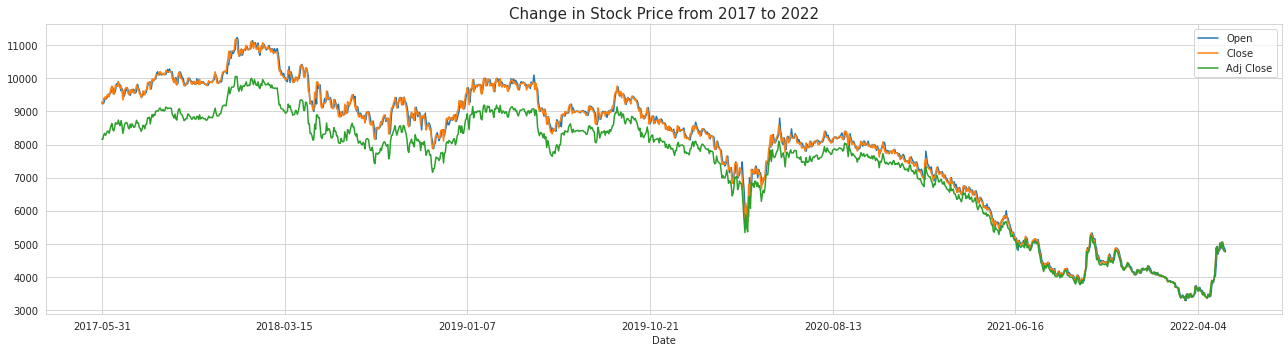

In [350]:
plt.figure(figsize=(12,4))
df[['Open','Close','Adj Close']].plot(figsize=(18,5))
plt.xlabel('Date', fontsize= 10)
plt.title('Change in Stock Price from 2017 to 2022',fontsize= 15)
plt.tight_layout()

In [351]:
# Top 5 Dates with Highest Value
a = df.sort_values(by='High',ascending= False).head(5)
print('Top 5 Dates with Highest Value:', a['High'])
# 5 Dates with lowest value
b = df.sort_values(by='Low',ascending= True).head(5)
print('Top 5 Dates with Lowest Value:', b['Low'])
#5 dates with lowHighest est daily return
c = df.sort_values(by='Daily_returns',ascending= False).head(5)
print('Top 5 Dates with Highest Daily returns:', c['Daily_returns'])

Top 5 Dates with Highest Value: Date
2018-01-02    11620.0
2017-12-29    11195.0
2018-01-01    11180.0
2018-01-03    11180.0
2018-01-25    11155.0
Name: High, dtype: float64
Top 5 Dates with Lowest Value: Date
2022-03-16    3280.0
2022-03-15    3280.0
2022-03-21    3330.0
2022-03-18    3340.0
2022-04-19    3350.0
Name: Low, dtype: float64
Top 5 Dates with Highest Daily returns: Date
2020-03-26    9.62
2020-03-31    6.59
2021-10-07    6.59
2022-05-11    5.58
2020-03-20    5.07
Name: Daily_returns, dtype: float64


since reaching its highes peak at January 1st 2018, UNVR's share price had been decreasing so that it formed a downward trend. Its lowest point is Rp3,280 per share. Next, UNVR shares has started showing an upward trend.

Text(0.5, 1.0, 'Comparison of Close and Adjustment Price')

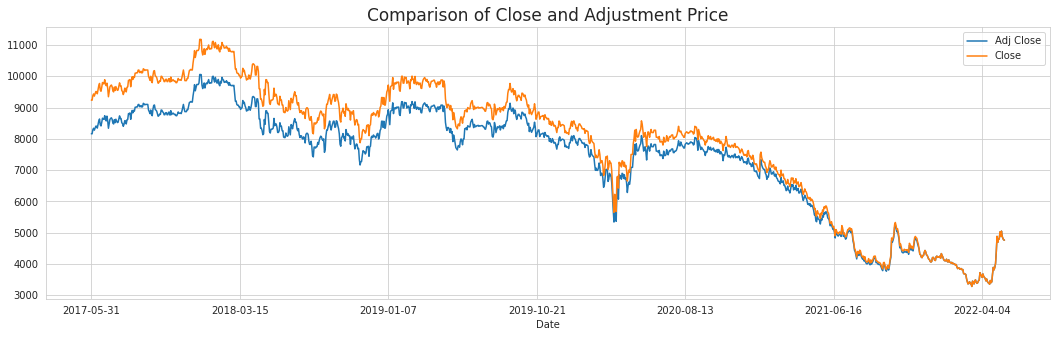

In [352]:
df[['Adj Close', 'Close']].plot(figsize=(18,5))
plt.title("Comparison of Close and Adjustment Price", fontsize=17)

In [353]:
filtered_data = df[df["Adj Close"]==df['Close']]
filtered_data

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2021-11-30,4600.0,4650.0,4460.0,4480.0,4480.0,3.173057,-1.00,-1.56
2021-12-01,4480.0,4550.0,4300.0,4310.0,4310.0,1.571571,-2.01,-1.66
2021-12-02,4310.0,4340.0,4220.0,4290.0,4290.0,1.215837,0.01,-1.66
2021-12-03,4300.0,4340.0,4200.0,4220.0,4220.0,0.983913,-1.00,-1.71
2021-12-06,4230.0,4250.0,4160.0,4200.0,4200.0,0.079142,0.01,-1.71
...,...,...,...,...,...,...,...,...
2022-05-20,4870.0,5125.0,4860.0,5050.0,5050.0,2.674968,1.53,-1.07
2022-05-23,5050.0,5075.0,4850.0,4880.0,4880.0,1.359345,-1.51,-1.17
2022-05-24,4920.0,4950.0,4700.0,4810.0,4810.0,1.499585,-0.49,-1.22


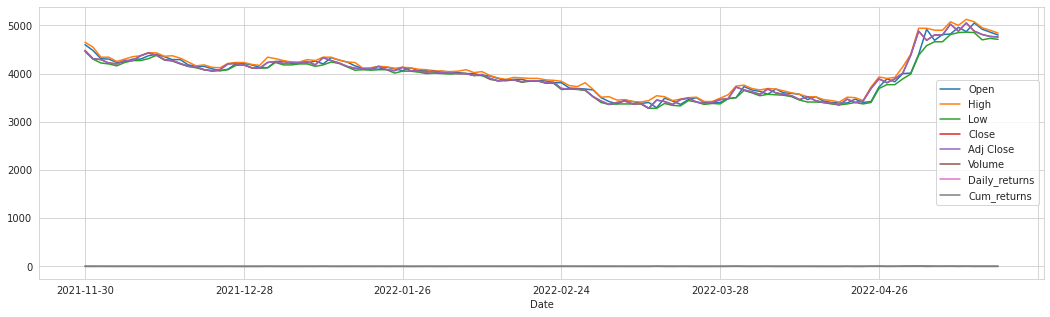

In [354]:
filtered_data.plot(figsize=(18,5))

`Close` only represent the cash value of the last transacted price before the market closes. On the above, from 2017 until 2021, mostly the closed and adjusted price had different value.
It meant that, most of the time the corporation had offered some additional shares of stock to raise additional money. These additional offerings might be offered as a rights offering, where current shareholders had the first right to purchase the shares at reduced prices.

<Figure size 1440x360 with 0 Axes>

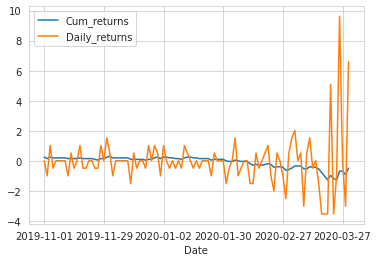

In [355]:
f= plt.figure(figsize=(20,5))
df[['Cum_returns','Daily_returns']].loc['2019-11-01':'2020-03-31'].plot()

In [356]:
df[['Open','Low','Close','Adj Close']] = scale.fit_transform(df[['Open','Low','Close','Adj Close']]).round(2)

In [357]:
g = df[['Open','Adj Close','Cum_returns', 'Daily_returns','Volume']].loc['2019-12-15':'2020-01-31']
g

,Open,Adj Close,Cum_returns,Daily_returns,Volume
Date,,,,,
2019-12-16,0.17,0.22,0.10,-0.49,-0.162841
2019-12-17,0.14,0.23,0.10,0.01,-0.265589
2019-12-18,0.14,0.22,0.10,0.01,0.044969
2019-12-19,0.14,0.20,0.05,-0.49,-0.022070
2019-12-20,0.12,0.30,0.10,1.02,0.252038
2019-12-23,0.21,0.30,0.10,0.01,-0.251034
2019-12-26,0.21,0.39,0.20,1.02,-0.368461
2019-12-27,0.29,0.43,0.25,0.52,-0.480491
2019-12-30,0.32,0.34,0.15,-1.00,-0.075511


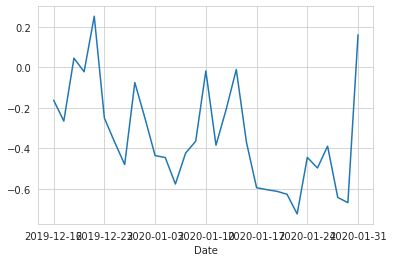

In [358]:
g['Volume'].plot()

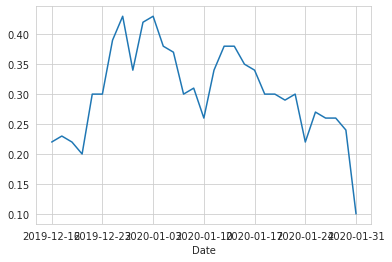

In [359]:
g['Adj Close'].plot()

Eversince UNVR split its share price on 02-01-2020, the stock transaction volume and price showed a downward trend in general. Coincidentally at that time the Covid-19 pandemic was starting to spread throughout the world, thus so many investors began to be careful in taking decisions (a bear stock market).

<Figure size 1080x360 with 0 Axes>

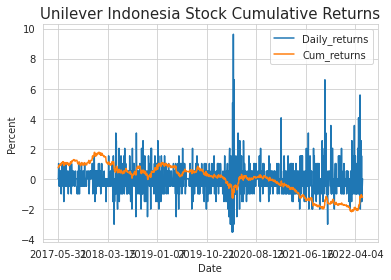

In [360]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df[['Daily_returns','Cum_returns']].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Unilever Indonesia Stock Cumulative Returns",fontsize= 15 )
plt.legend()

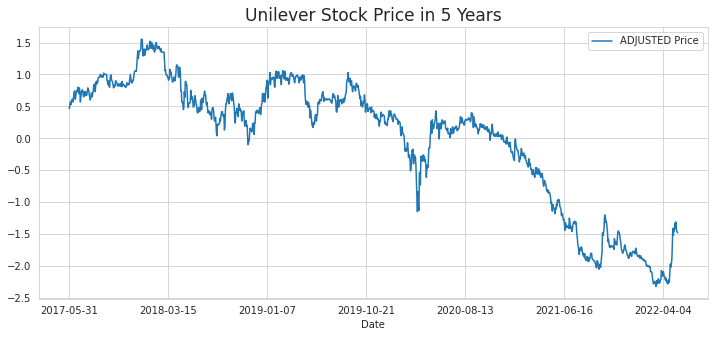

In [361]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
df['Adj Close'].plot(label='ADJUSTED Price')
plt.title("Unilever Stock Price in 5 Years", fontsize=17)
plt.legend()

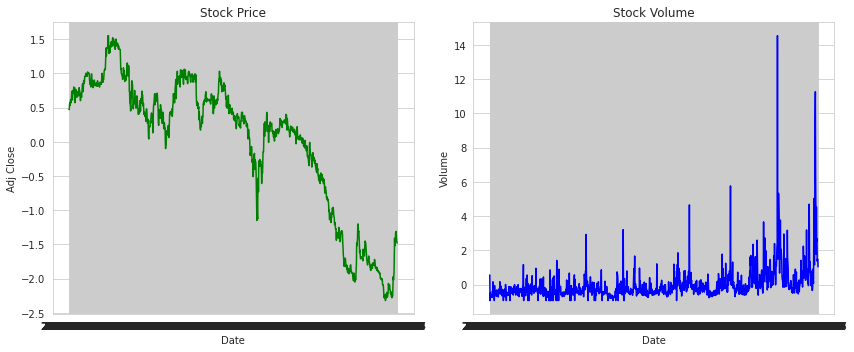

In [362]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
sns.lineplot(ax= axes[0], y=df['Adj Close'],x=df.index, color='green')
axes[0].set_title('Stock Price')
sns.lineplot(ax= axes[1], y=df['Volume'], x=df.index, color='blue')
axes[1].set_title('Stock Volume')
plt.tight_layout()
plt.show()

However, since 2022-02-25, Unilever's share price has started to show an upward trend, supported by the decline in Covid-19 cases and economy recovery around the world. This could be a good sign for many inverstors to enter the market

#Predicting Unilever Stock Price

Using Linear Reggression

In [425]:
#import lib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

##Ridge Regression

In [364]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2017-05-31,0.67,9405.0,0.68,0.65,0.47,0.561640,0.01,0.74
2017-06-01,0.65,9235.0,0.69,0.65,0.47,-0.933946,0.01,0.74
2017-06-02,0.65,9405.0,0.70,0.72,0.54,-0.505869,1.02,0.84
2017-06-05,0.70,9440.0,0.73,0.75,0.57,-0.731842,0.52,0.88
2017-06-06,0.74,9450.0,0.75,0.71,0.53,-0.727586,-0.49,0.84


In [411]:
feature = df[['Low','Close','Volume']]
target = df['Adj Close']
#splitting data
feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

In [412]:
#train the data
from sklearn.linear_model import Ridge

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [413]:
from sklearn.metrics import mean_squared_error

X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.07975950677652789
RMSE of Ridge regression model with alpha = 0.1 is 0.07933636679533053
RMSE of Ridge regression model with alpha = 1.0 is 0.07921198507605737
RMSE of Ridge regression model with alpha = 10 is 0.08151919532115372


In [414]:
#model evaluation
ridge_best = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-0.002814
1,Low,0.250293
2,Close,0.745519
3,Volume,0.000844


THE MODEL\
`Adj Close` = -0.002814 + 0.25 `Low` + 0.74 `Close` + 0.000844 `Volume`

In [415]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(feature_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [416]:
#diagnostic study
from sklearn.metrics import r2_score

print('R-squared for training data is {}'.format(r2_score(target_train, y_predict_train)))

R-squared for training data is 0.9935592961806875


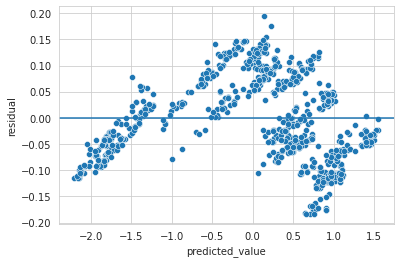

In [417]:
# calculate residuals
residual = y_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [418]:
#training error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 0.08102267943613581
MAE for training data is 0.07014722372590397
MAPE for training data is 0.28599959385957524


In [419]:
#testing error
# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_predict_test = ridge_best.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [420]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 0.07890946688856505
MAE for testing data is 0.06913673569217617
MAPE for testing data is 1719148481002.0845


##Interpretation


1. The R2 Score is 99,35%, means that the model can capture 99,35% of the data
2. The difference between RMSE and MAE for training data is 0.11 which interpretes as not large
3. MAPE for training data is 28,59%\
0.11 difference between RMSE and MAE is equivalent to 28,59% deviation relative to the true Adj Close. the actual price can be either 28% higher or lower.
4. comparing to the result on training data :\
RMSE for training data is 0.08102267943613581
MAE for training data is 0.07014722372590397
MAPE for training data is 0.28599959385957524
the difference of RSME of training data and testing data is not large. Therefore, the model is somewhat indicating not an overfitting model.
5. But, from the model evaluation, it can be said that the model is underfitting. This could happen since in the last 5 years UNVR had showed an abnormal stock price changes.


